In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [15]:
data = pd.read_csv("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Machine Learning/SM+SS/27-02-23/train.csv")

In [16]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [17]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [21]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1, random_state=43)

In [22]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [23]:
pred = model.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.91      0.96      0.94        53
           2       0.98      0.86      0.91        56
           3       0.92      0.98      0.95        46

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [26]:
"{0:.2f}%".format(accuracy_score(y_test, pred) * 100)

'94.00%'

In [27]:
cm = confusion_matrix(y_test, pred)
cm

array([[44,  1,  0,  0],
       [ 2, 51,  0,  0],
       [ 0,  4, 48,  4],
       [ 0,  0,  1, 45]])

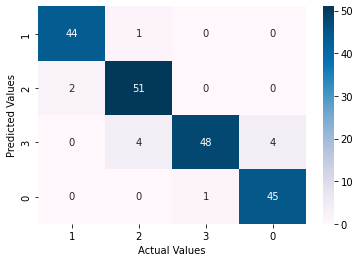

In [29]:
classes = data['price_range'].unique()

df_cm = pd.DataFrame(cm, classes, classes)
sns.heatmap(df_cm, annot=True, cmap="PuBu")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()